# Starbucks regression project

importing important libraries 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from io import StringIO
import csv
############################################
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
############################################
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
############################################
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


get the data from mraket watch 

In [2]:
data_sbux=pd.DataFrame()
############################################
url1='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2016%2000:00:00&enddate=01/01/2017%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url1)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url2='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2017%2000:00:00&enddate=01/01/2018%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url2)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url3='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2018%2000:00:00&enddate=01/01/2019%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url3)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url4='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2019%2000:00:00&enddate=01/01/2020%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url4)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url5='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2020%2000:00:00&enddate=01/01/2021%2000:00:00&daterange=d30&frequency=p1D&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url5)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################
url6='https://www.marketwatch.com/investing/stock/sbux/downloaddatapartial?startdate=01/01/2021%2000:00:00&enddate=12/06/2021%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
website = requests.get(url6)
soup = BeautifulSoup(website.text, 'html')
file=StringIO(soup.text)
read= csv.reader(file)
read_list=list(read)
data_sbux =data_sbux.append(read_list,ignore_index= True)
############################################

print(data_sbux)
data_sbux

               0       1       2       3       4          5
0           Date    Open    High     Low   Close     Volume
1     12/30/2016   56.28   56.45   55.40   55.52  8,344,508
2     12/29/2016   56.35   56.47   56.14   56.32  3,781,721
3     12/28/2016   56.80   56.90   56.25   56.35  5,548,726
4     12/27/2016   56.99   57.39   56.81   56.86  4,186,157
...          ...     ...     ...     ...     ...        ...
1494  01/08/2021  103.86  105.76  103.42  105.67  5,869,677
1495  01/07/2021  104.49  104.64  102.95  103.35  5,057,016
1496  01/06/2021  102.99  105.21  102.91  104.19  5,017,464
1497  01/05/2021  102.92  104.26  102.80  103.44  5,721,905
1498  01/04/2021  107.66  107.75  102.14  103.10  8,041,533

[1499 rows x 6 columns]


,0,1,2,3,4,5
0,Date,Open,High,Low,Close,Volume
1,12/30/2016,56.28,56.45,55.40,55.52,"8,344,508"
2,12/29/2016,56.35,56.47,56.14,56.32,"3,781,721"
3,12/28/2016,56.80,56.90,56.25,56.35,"5,548,726"
4,12/27/2016,56.99,57.39,56.81,56.86,"4,186,157"
...,...,...,...,...,...,...
1494,01/08/2021,103.86,105.76,103.42,105.67,"5,869,677"
1495,01/07/2021,104.49,104.64,102.95,103.35,"5,057,016"
1496,01/06/2021,102.99,105.21,102.91,104.19,"5,017,464"
1497,01/05/2021,102.92,104.26,102.80,103.44,"5,721,905"


clean the data and spliting them 

In [3]:
def cleanning(df):
    df=df.rename(columns = {0:'DATE',1:'OPEN',2:'HIGH',3:'LOW',4:'CLOSE',5:'VOLUME'}, inplace = False)
    df.drop(['OPEN','VOLUME','LOW','HIGH'],inplace=True,axis=1)
    df.drop(df.index[df['DATE'] == 'Date'], inplace = True)
    df.dropna(inplace=True)
    df.set_index('DATE',inplace=True)
    df.index = pd.to_datetime(df.index)
    df['CLOSE']=df['CLOSE'].astype(float)
    df.sort_index(inplace=True)
    return df

data_sbux=cleanning(data_sbux)
print(data_sbux)

n=int(len(data_sbux)*0.94)
m=int(n*0.1)

data_sbux_train=data_sbux[:n-m]
data_sbux_valid=data_sbux[n-m:n]
data_sbux_test=data_sbux[n:]

data_sbux

             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-11-30  109.64
2021-12-01  108.66
2021-12-02  111.42
2021-12-03  111.24
2021-12-06  113.36

[1493 rows x 1 columns]


,CLOSE
DATE,
2016-01-04,58.26
2016-01-05,58.65
2016-01-06,58.13
2016-01-07,56.69
2016-01-08,56.63
...,...
2021-11-30,109.64
2021-12-01,108.66
2021-12-02,111.42


In [4]:
print(data_sbux_train)
print(data_sbux_train.info())
print("##################################")
print(data_sbux_valid)
print(data_sbux_valid.info())
print("##################################")
print(data_sbux_test)
print(data_sbux_test.info())
print("##################################")


             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2020-12-31  106.98
2021-01-04  103.10
2021-01-05  103.44
2021-01-06  104.19
2021-01-07  103.35

[1263 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1263 entries, 2016-01-04 to 2021-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   1263 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB
None
##################################
             CLOSE
DATE              
2021-01-08  105.67
2021-01-11  104.60
2021-01-12  102.82
2021-01-13  102.89
2021-01-14  101.82
...            ...
2021-07-23  125.97
2021-07-26  126.06
2021-07-27  126.03
2021-07-28  122.41
2021-07-29  122.38

[140 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2021-01-08 to 2021-07-29
Data columns (total 1 columns):
 #   Column  Non-N

In [5]:
print(data_sbux_train.info())
print("##################################")
print(data_sbux_valid.info())
print("##################################")
print(data_sbux_test.info())
print("##################################")


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1263 entries, 2016-01-04 to 2021-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   1263 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB
None
##################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2021-01-08 to 2021-07-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   140 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB
None
##################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2021-07-30 to 2021-12-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   90 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB
None
##################################


ploting the data sets

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

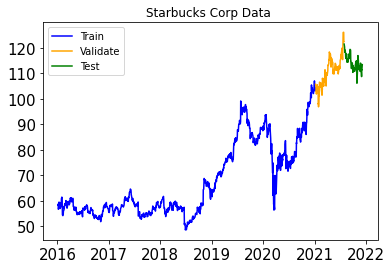

In [6]:
train = plt.plot(data_sbux_train, color='blue',label='Train')
validate = plt.plot(data_sbux_valid, color='orange', label='Validate')
test = plt.plot(data_sbux_test, color='green', label = 'Test')
plt.legend(loc='best')
plt.title('Starbucks Corp Data ')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

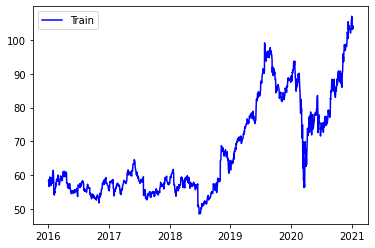

In [7]:
train = plt.plot(data_sbux_train, color='blue',label='Train')
plt.legend(loc='best')


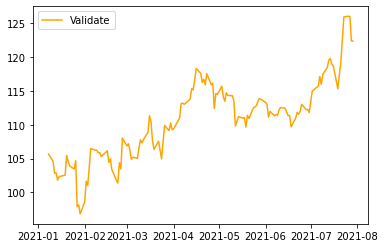

In [8]:
validate = plt.plot(data_sbux_valid, color='orange', label='Validate')
plt.legend(loc='best')


(array([18840., 18861., 18871., 18892., 18901., 18922., 18932., 18953.,
        18962.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

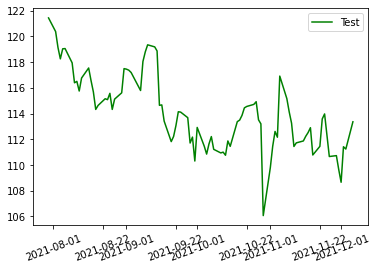

In [9]:
test = plt.plot(data_sbux_test, color='green', label = 'Test')
plt.legend(loc='best')
plt.xticks(rotation=20)

do the kpss, and dicky fuller

In [10]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [11]:
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        pvalue = dftest[1]
        if pvalue < cutoff:
            print('p-value = %.4f. The series is likely stationary.' % pvalue)
        else:
            print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

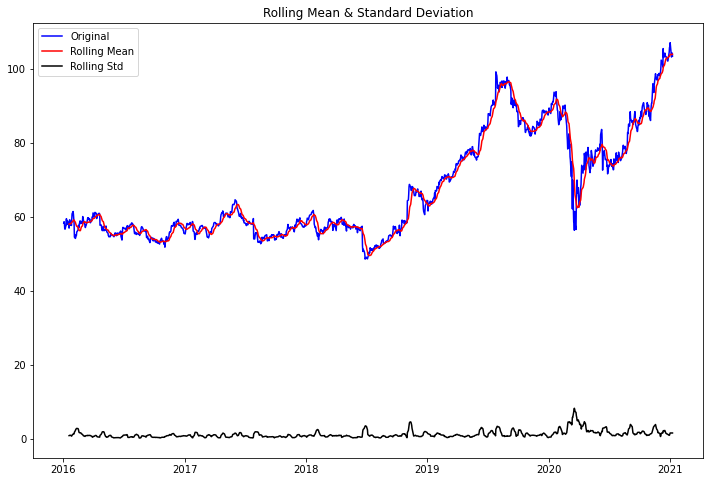

Results of Dickey-Fuller Test:
p-value = 0.9387. The series is likely non-stationary.
p-value = 0.9387. The series is likely non-stationary.
p-value = 0.9387. The series is likely non-stationary.
Test Statistic                   -0.198517
p-value                           0.938698
#Lags Used                       10.000000
Number of Observations Used    1252.000000
Critical Value (1%)              -3.435584
Critical Value (5%)              -2.863851
Critical Value (10%)             -2.568001
dtype: float64


In [12]:
test_stationarity(data_sbux_train)

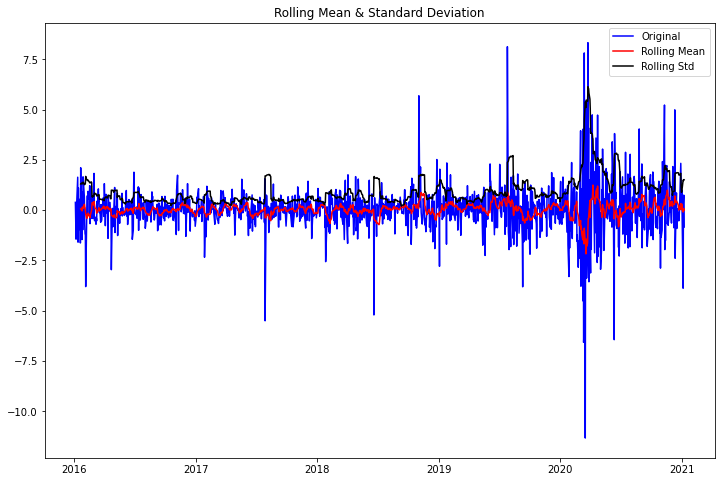

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.102202e+01
p-value                        5.954659e-20
#Lags Used                     9.000000e+00
Number of Observations Used    1.252000e+03
Critical Value (1%)           -3.435584e+00
Critical Value (5%)           -2.863851e+00
Critical Value (10%)          -2.568001e+00
dtype: float64


In [13]:
new=data_sbux_train.diff()
new.dropna(inplace=True)
test_stationarity(new)

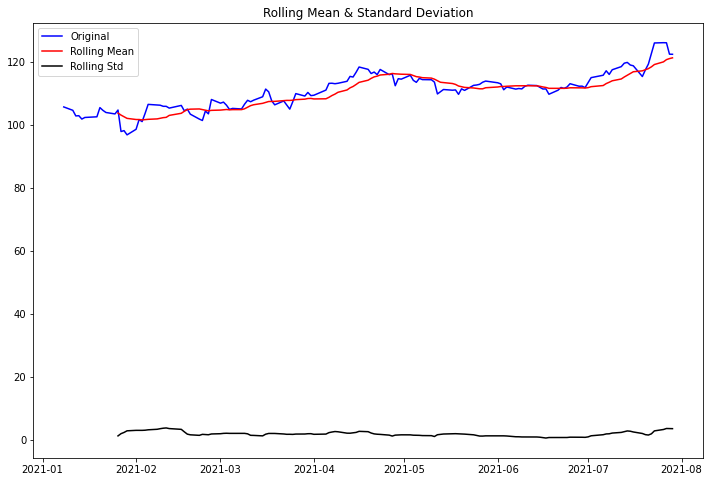

Results of Dickey-Fuller Test:
p-value = 0.7325. The series is likely non-stationary.
p-value = 0.7325. The series is likely non-stationary.
p-value = 0.7325. The series is likely non-stationary.
Test Statistic                  -1.055464
p-value                          0.732502
#Lags Used                       3.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [14]:
test_stationarity(data_sbux_valid)

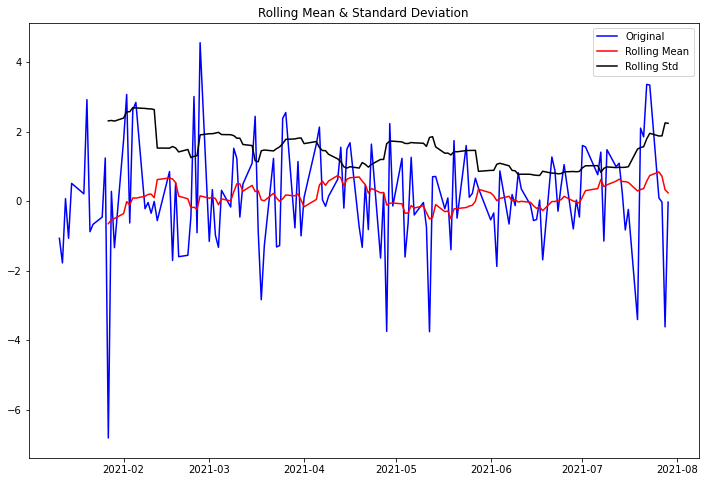

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -7.046776e+00
p-value                        5.660097e-10
#Lags Used                     3.000000e+00
Number of Observations Used    1.350000e+02
Critical Value (1%)           -3.479743e+00
Critical Value (5%)           -2.883198e+00
Critical Value (10%)          -2.578320e+00
dtype: float64


In [15]:
new=data_sbux_valid.diff()
new.dropna(inplace=True)
test_stationarity(new)

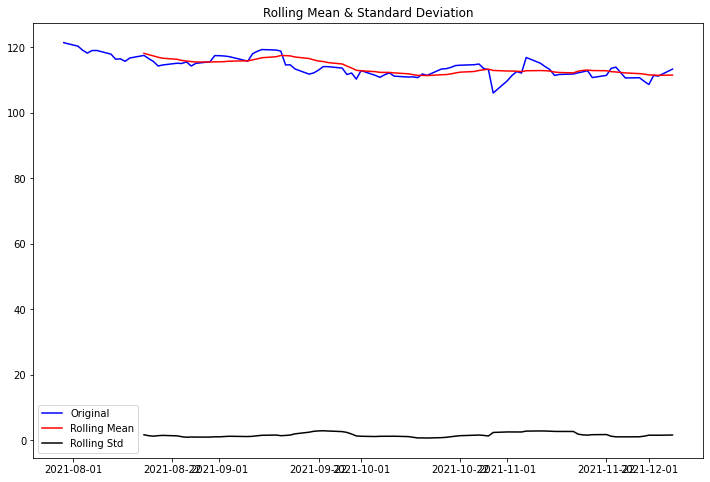

Results of Dickey-Fuller Test:
p-value = 0.0160. The series is likely non-stationary.
p-value = 0.0160. The series is likely non-stationary.
p-value = 0.0160. The series is likely non-stationary.
Test Statistic                 -3.275931
p-value                         0.015989
#Lags Used                      0.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [16]:
test_stationarity(data_sbux_test)

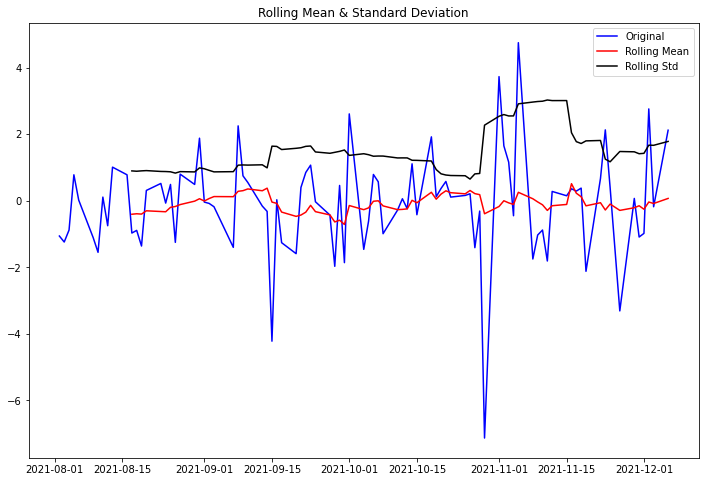

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.105711e+00
p-value                        9.596240e-08
#Lags Used                     4.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


In [17]:
new=data_sbux_test.diff()
new.dropna(inplace=True)
test_stationarity(new)

In [18]:
kpss_test(data_sbux_train)

KPSS Statistic: 3.8230076578885015
p-value: 0.01
num lags: 23
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [19]:
newk=data_sbux_train.diff()
newk.dropna(inplace=True)
kpss_test(newk)

KPSS Statistic: 0.168602206240232
p-value: 0.1
num lags: 23
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [20]:
kpss_test(data_sbux_valid)

KPSS Statistic: 0.8406959724635442
p-value: 0.01
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [21]:
newk=data_sbux_valid.diff()
newk.dropna(inplace=True)
kpss_test(newk)

KPSS Statistic: 0.11705925863553795
p-value: 0.1
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [22]:
kpss_test(data_sbux_test)

KPSS Statistic: 0.6626361735200191
p-value: 0.016942166043634622
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [23]:
newk=data_sbux_test.diff()
newk.dropna(inplace=True)
kpss_test(newk)

KPSS Statistic: 0.20032807254771026
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


# trying different ARIMA models

# This is using AR and MA as 1
1,1,0

In [24]:
model=ARIMA(data_sbux_train, order=(0,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)



0.03572900158478375
6.736749820129653


In [25]:
model=ARIMA(data_sbux_train, order=(1,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.18177178481712283
6.650977012275106


In [26]:
model=ARIMA(data_sbux_train, order=(0,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.1634623109665677
6.656528883795949


In [27]:
model=ARIMA(data_sbux_train, order=(1,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.18474946386201038
6.654123950977889


# This is using AR and MA as 2  
2,1,1

In [28]:
model=ARIMA(data_sbux_train, order=(2,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.186772163535113
6.655391606048921


In [29]:
model=ARIMA(data_sbux_train, order=(2,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.2288112984080849
6.559330841408596


In [30]:
model=ARIMA(data_sbux_train, order=(0,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.19612852859946983
6.647123898625042


In [31]:
model=ARIMA(data_sbux_train, order=(1,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.19107364958081885
6.580776885147829


In [32]:
model=ARIMA(data_sbux_train, order=(2,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.2943425890267177
6.716044487153498


# This is using AR and MA as 3  
1,1,3

In [33]:
model=ARIMA(data_sbux_train, order=(3,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.1942665086003756
6.650620983965946


In [34]:
model=ARIMA(data_sbux_train, order=(3,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.25649640697128684
6.537453745507623


In [35]:
model=ARIMA(data_sbux_train, order=(3,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.2990064717711579
6.738728570712182


In [36]:
model=ARIMA(data_sbux_train, order=(0,1,3))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.1940685123484152
6.660022161359368


In [37]:
model=ARIMA(data_sbux_train, order=(1,1,3))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.2381034677522918
6.534312738053918


In [38]:
model=ARIMA(data_sbux_train, order=(2,1,3))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)


0.2984228449906889
6.736931950599788


# This is using AR and MA as 4 
4,1,2

In [39]:
model=ARIMA(data_sbux_train, order=(4,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.1978651921451087
6.567907385600863


In [40]:
model=ARIMA(data_sbux_train, order=(4,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.2596309333749754
6.531813026704304


In [41]:
model=ARIMA(data_sbux_train, order=(4,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.2583877561807341
6.487219747280541


In [42]:
model=ARIMA(data_sbux_train, order=(0,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.20509633020092616
6.5153105376100955


In [43]:
model=ARIMA(data_sbux_train, order=(1,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.24134678142447366
6.510235458729059


In [44]:
model=ARIMA(data_sbux_train, order=(2,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.3006702172738973
6.742393877556657


In [45]:
model=ARIMA(data_sbux_train, order=(3,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.2991347806390878
6.767732998387691


In [46]:
model=ARIMA(data_sbux_train, order=(4,1,4))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.30481615897317754
6.615923104811466


# This is using AR and MA as 5  
0,1,5

In [47]:
model=ARIMA(data_sbux_train, order=(5,1,0))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.19787184703825342
6.571224612712827


In [48]:
model=ARIMA(data_sbux_train, order=(5,1,1))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.26795810143805043
6.69776398537213


In [49]:
model=ARIMA(data_sbux_train, order=(5,1,2))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.3034482012753727
6.765165325520771


In [50]:
model=ARIMA(data_sbux_train, order=(0,1,5))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.20534136417474538
6.503516748239613


In [51]:
model=ARIMA(data_sbux_train, order=(1,1,5))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.2381523160264269
6.5624251024378975


In [52]:
model=ARIMA(data_sbux_train, order=(2,1,5))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.30172896304141067
6.779632911964643


In [53]:
model=ARIMA(data_sbux_train, order=(5,1,5))
result=model.fit()
#print(result.summary())
start=1
end=len(data_sbux_train)
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
x=np.sqrt(metrics.mean_squared_error(data_sbux_train,pred))



start=len(data_sbux_train)
end=len(data_sbux_train)+len(data_sbux_valid)-1
pred= result.predict(start=start,end=end,typ='levels')
#print(pred)
y=np.sqrt(metrics.mean_squared_error(data_sbux_valid,pred))
print(x)
print(y)

0.33795896878813153
6.747575227138699


# Web Scrapping using beautiful soup

In [54]:
url='https://www.marketwatch.com/investing/stock/sbux/download-data?mod=mw_quote_tab'
website = requests.get(url)
soup = BeautifulSoup(website.text, 'html')



In [55]:
print(soup.find('thead',{ "class" : "table__head" }))

<thead class="table__head">
<tr class="table__row">
<th class="overflow__heading fixed--column">
<div class="cell__content fixed--cell">Date</div>
<div class="cell__content">Date</div>
</th>
<th class="overflow__heading"><div class="cell__content">Open</div></th>
<th class="overflow__heading"><div class="cell__content">High</div></th>
<th class="overflow__heading"><div class="cell__content">Low</div></th>
<th class="overflow__heading"><div class="cell__content">Close</div></th>
<th class="overflow__heading"><div class="cell__content">Volume</div></th>
</tr>
</thead>


In [56]:
print(soup.find('tbody',{ "class" : "table__body row-hover" }))

<tbody class="table__body row-hover">
<tr class="table__row">
<td class="overflow__cell fixed--column">
<div class="cell__content fixed--cell u-secondary">12/07/2021</div>
<div class="cell__content u-secondary">12/07/2021</div>
</td>
<td class="overflow__cell"><div class="cell__content">$115.06</div></td>
<td class="overflow__cell"><div class="cell__content">$117.19</div></td>
<td class="overflow__cell"><div class="cell__content">$114.79</div></td>
<td class="overflow__cell"><div class="cell__content">$116.26</div></td>
<td class="overflow__cell"><div class="cell__content">8,786,898</div></td>
</tr>
<tr class="table__row">
<td class="overflow__cell fixed--column">
<div class="cell__content fixed--cell u-secondary">12/06/2021</div>
<div class="cell__content u-secondary">12/06/2021</div>
</td>
<td class="overflow__cell"><div class="cell__content">$112.01</div></td>
<td class="overflow__cell"><div class="cell__content">$114.17</div></td>
<td class="overflow__cell"><div class="cell__conten

# The final result

using the best fit of ARIMA model (4,1,2) and repeating all the previous steps

             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-07-23  125.97
2021-07-26  126.06
2021-07-27  126.03
2021-07-28  122.41
2021-07-29  122.38

[1403 rows x 1 columns]
             CLOSE
DATE              
2021-07-30  121.43
2021-08-02  120.37
2021-08-03  119.13
2021-08-04  118.25
2021-08-05  119.03
...            ...
2021-11-30  109.64
2021-12-01  108.66
2021-12-02  111.42
2021-12-03  111.24
2021-12-06  113.36

[90 rows x 1 columns]


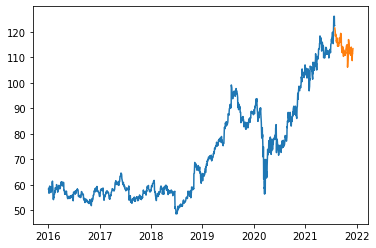

In [57]:
data_sbux_train_final=data_sbux[:n]
data_sbux_test_final=data_sbux[n:]
print(data_sbux_train_final)
print(data_sbux_test_final)
plt.plot(data_sbux_train_final)
plt.plot(data_sbux_test_final)

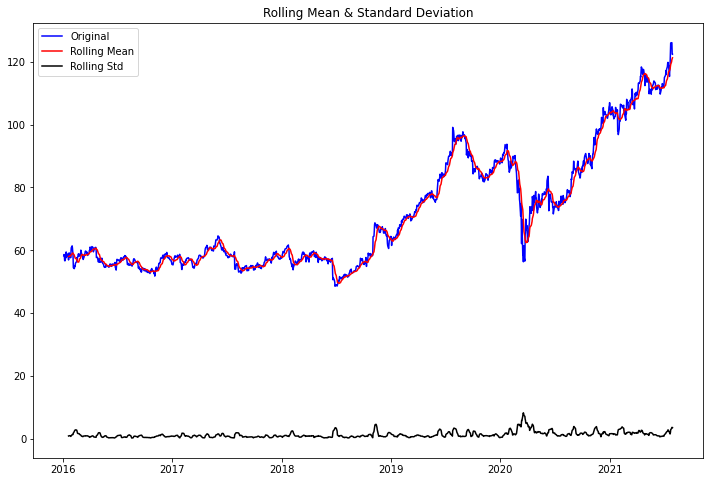

Results of Dickey-Fuller Test:
p-value = 0.9841. The series is likely non-stationary.
p-value = 0.9841. The series is likely non-stationary.
p-value = 0.9841. The series is likely non-stationary.
Test Statistic                    0.476256
p-value                           0.984133
#Lags Used                        9.000000
Number of Observations Used    1393.000000
Critical Value (1%)              -3.435053
Critical Value (5%)              -2.863617
Critical Value (10%)             -2.567876
dtype: float64


In [58]:
test_stationarity(data_sbux_train_final)

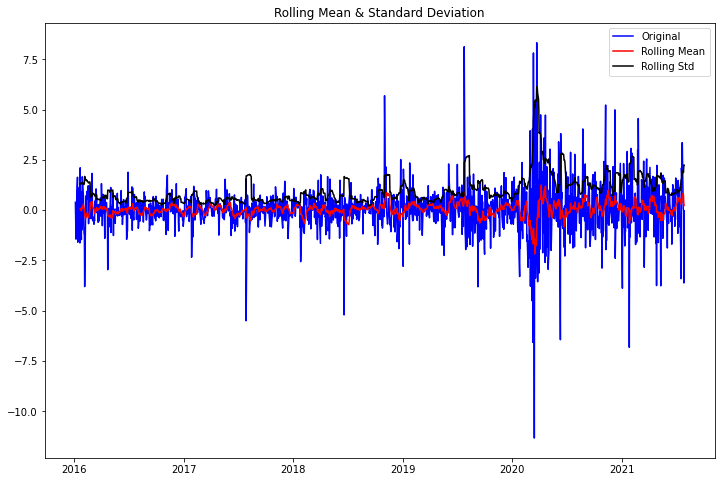

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.214186e+01
p-value                        1.644015e-22
#Lags Used                     8.000000e+00
Number of Observations Used    1.393000e+03
Critical Value (1%)           -3.435053e+00
Critical Value (5%)           -2.863617e+00
Critical Value (10%)          -2.567876e+00
dtype: float64


In [59]:
new=data_sbux_train_final.diff()
new.dropna(inplace=True)
test_stationarity(new)

In [60]:
kpss_test(data_sbux_train_final)

KPSS Statistic: 4.375532905829127
p-value: 0.01
num lags: 24
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [61]:
new=data_sbux_train_final.diff()
new.dropna(inplace=True)
kpss_test(new)

KPSS Statistic: 0.2670422690179841
p-value: 0.1
num lags: 24
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


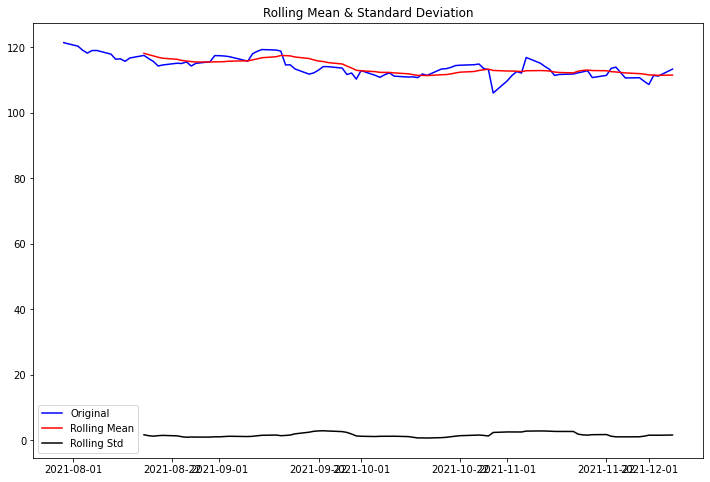

Results of Dickey-Fuller Test:
p-value = 0.0160. The series is likely non-stationary.
p-value = 0.0160. The series is likely non-stationary.
p-value = 0.0160. The series is likely non-stationary.
Test Statistic                 -3.275931
p-value                         0.015989
#Lags Used                      0.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [62]:
test_stationarity(data_sbux_test_final)

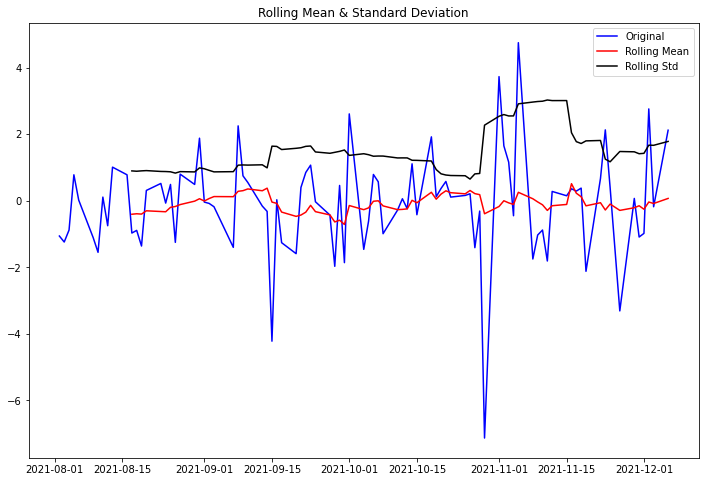

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.105711e+00
p-value                        9.596240e-08
#Lags Used                     4.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


In [63]:
new=data_sbux_test_final.diff()
new.dropna(inplace=True)
test_stationarity(new)

In [64]:
kpss_test(data_sbux_test_final)

KPSS Statistic: 0.6626361735200191
p-value: 0.016942166043634622
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [65]:
new=data_sbux_test_final.diff()
new.dropna(inplace=True)
kpss_test(new)

KPSS Statistic: 0.20032807254771026
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [66]:
model_final=ARIMA(data_sbux_train_final, order=(4,1,2))
result_final=model_final.fit()
#print(result_final.summary())
############################################################
start=1
end=len(data_sbux_train_final)
pred_train= result_final.predict(start=start,end=end,typ='levels')
pred_train.index=data_sbux_train_final.index

print(pred_train)
print(data_sbux_train_final)
q=np.sqrt(metrics.mean_squared_error(data_sbux_train_final,pred_train))
print(q)

############################################################
start=len(data_sbux_train_final)
end=len(data_sbux_test_final)+len(data_sbux_train_final)-1
pred_test= result_final.predict(start=start,end=end,typ='levels')
pred_test.index=data_sbux_test_final.index
print(data_sbux_test_final)
print(pred_test)
a=np.sqrt(metrics.mean_squared_error(data_sbux_test_final,pred_test))
print(a)
z=data_sbux_test_final.mean()
print(z)

DATE
2016-01-04     58.305666
2016-01-05     58.649464
2016-01-06     58.264982
2016-01-07     56.903386
2016-01-08     56.568453
                 ...    
2021-07-23    125.551790
2021-07-26    126.349283
2021-07-27    125.700467
2021-07-28    122.736118
2021-07-29    122.104033
Length: 1403, dtype: float64
             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-07-23  125.97
2021-07-26  126.06
2021-07-27  126.03
2021-07-28  122.41
2021-07-29  122.38

[1403 rows x 1 columns]
0.23596924955878643
             CLOSE
DATE              
2021-07-30  121.43
2021-08-02  120.37
2021-08-03  119.13
2021-08-04  118.25
2021-08-05  119.03
...            ...
2021-11-30  109.64
2021-12-01  108.66
2021-12-02  111.42
2021-12-03  111.24
2021-12-06  113.36

[90 rows x 1 columns]
DATE
2021-07-30    122.104033
2021-08-02    122.115055
2021-08-03    122.411595
2021-08-04    122.331100
2021-08-05    122.580713

ploting the actual and predicted values 

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

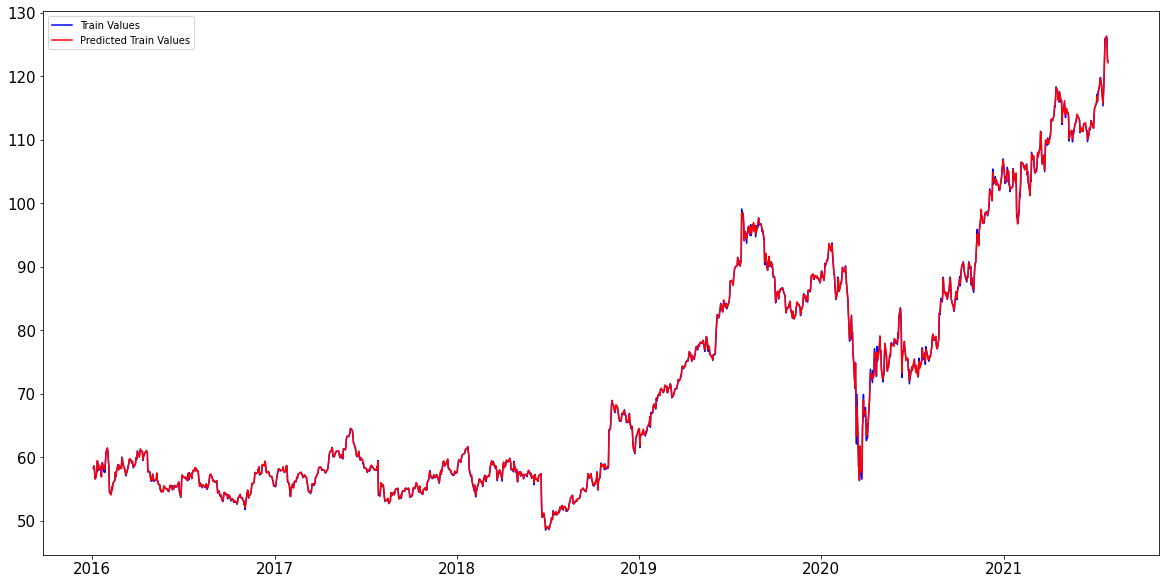

In [67]:
N=20
M=10
fig, ax = plt.subplots(figsize=(N, M))

actual = plt.plot(data_sbux_train_final, color='blue',label='Train Values')
predicted = plt.plot(pred_train, color='red',label='Predicted Train Values')

plt.legend(loc='best')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5, 125. ,
        127.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

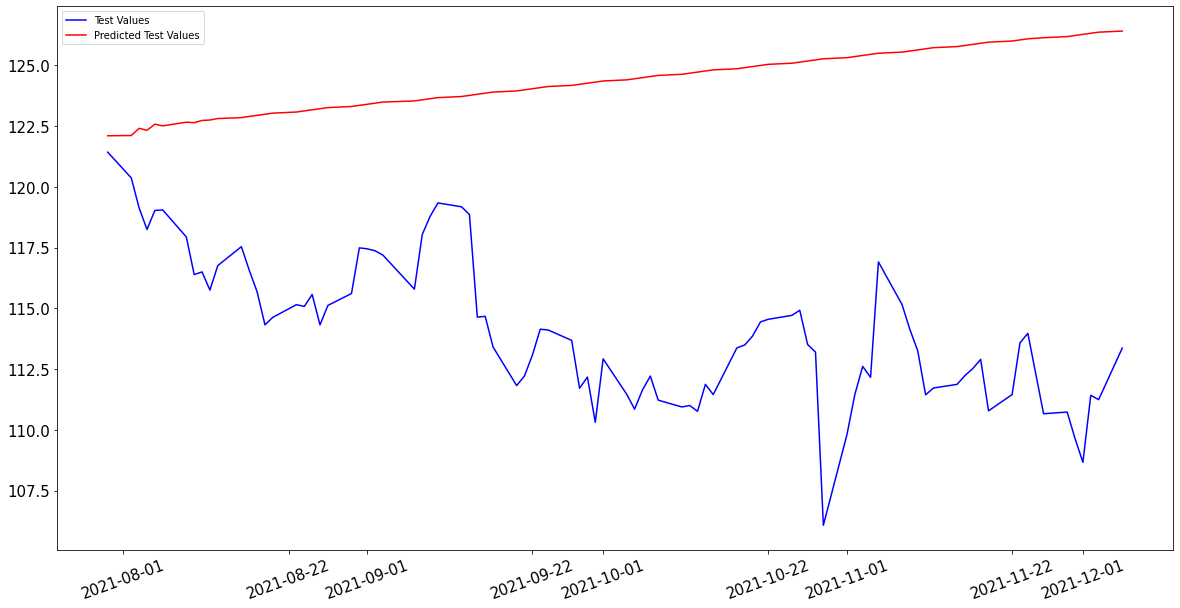

In [68]:
N=20
M=10
fig, ax = plt.subplots(figsize=(N, M))

actual = plt.plot(data_sbux_test_final, color='blue',label='Test Values')
predicted = plt.plot(pred_test, color='red',label='Predicted Test Values')

plt.legend(loc='best')
plt.xticks(fontsize=15,rotation=20)
plt.yticks(fontsize=15)

calculating the residual error 

             CLOSE
DATE              
2016-01-04   58.26
2016-01-05   58.65
2016-01-06   58.13
2016-01-07   56.69
2016-01-08   56.63
...            ...
2021-07-22  122.63
2021-07-23  125.97
2021-07-26  126.06
2021-07-27  126.03
2021-07-28  122.41

[1402 rows x 1 columns]
1402


(array([-12.5, -10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,
         10. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

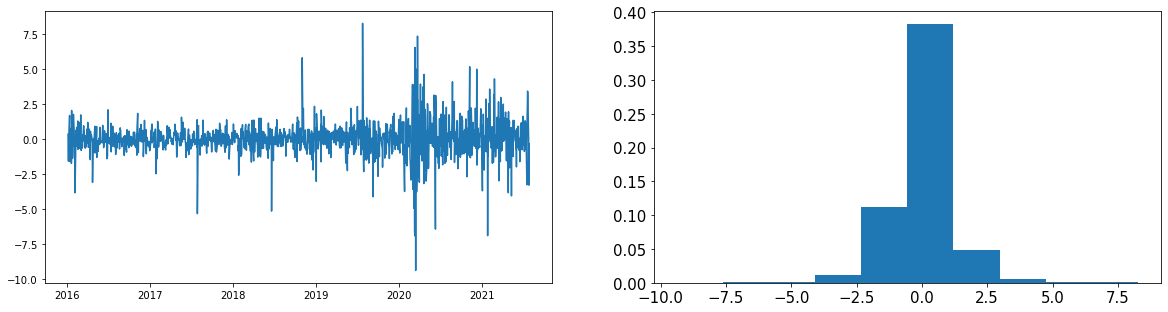

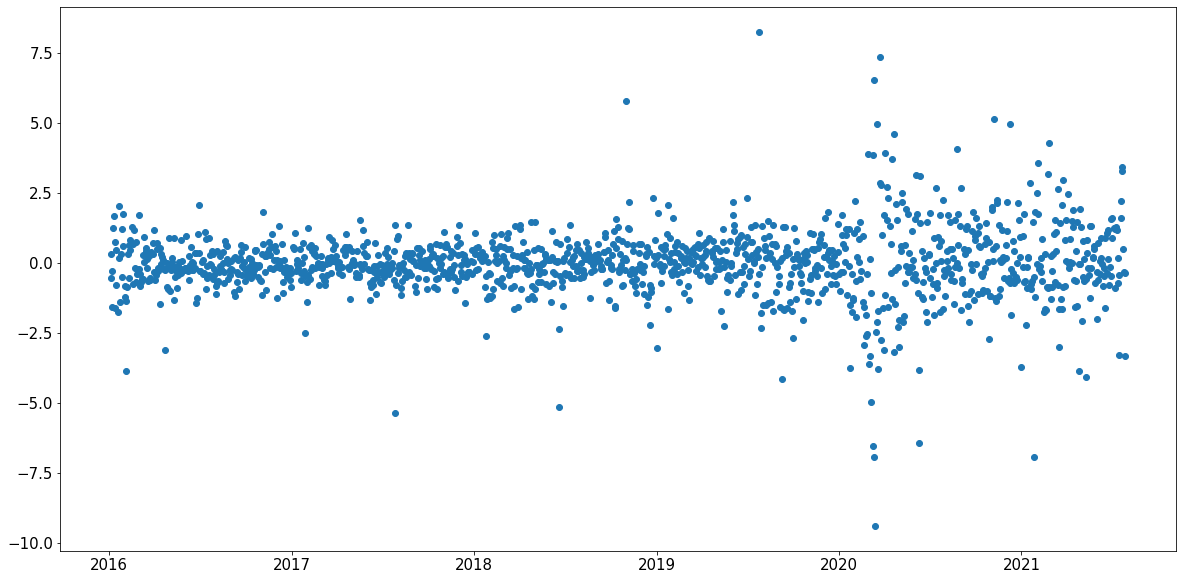

In [69]:
residual =pd.DataFrame(result_final.resid)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))


ax1.plot(residual)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2.hist(residual,density=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


fig, ax = plt.subplots(figsize=(20, 10))
x=data_sbux_train_final[:len(data_sbux_train_final)-1]
print(x)
print(len(residual))
plt.scatter(x.index,residual)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Predicting the next year 

In [70]:
model_final=ARIMA(data_sbux, order=(4,1,2))
result_final=model_final.fit()

index_predf=pd.date_range(start='2021-12-6',end='2022-12-6')
print(len(index_predf))

predf=result_final.predict(start=len(data_sbux),end=len(data_sbux)+365,typ='levels').rename('ARIMA Predection')
predf.index=index_predf
print(predf)

366
2021-12-06    113.129288
2021-12-07    113.188868
2021-12-08    113.243570
2021-12-09    113.035415
2021-12-10    113.195894
                 ...    
2022-12-02    126.138416
2022-12-03    126.175029
2022-12-04    126.211641
2022-12-05    126.248253
2022-12-06    126.284865
Freq: D, Name: ARIMA Predection, Length: 366, dtype: float64


(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

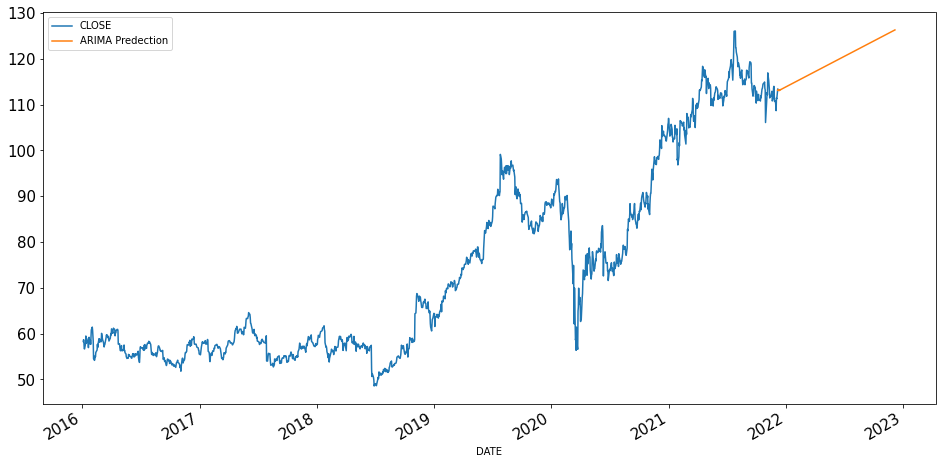

In [71]:
N=16
M=8
fig, ax = plt.subplots(figsize=(N, M))
data_sbux.CLOSE.plot(legend=True)
predf.plot(legend=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

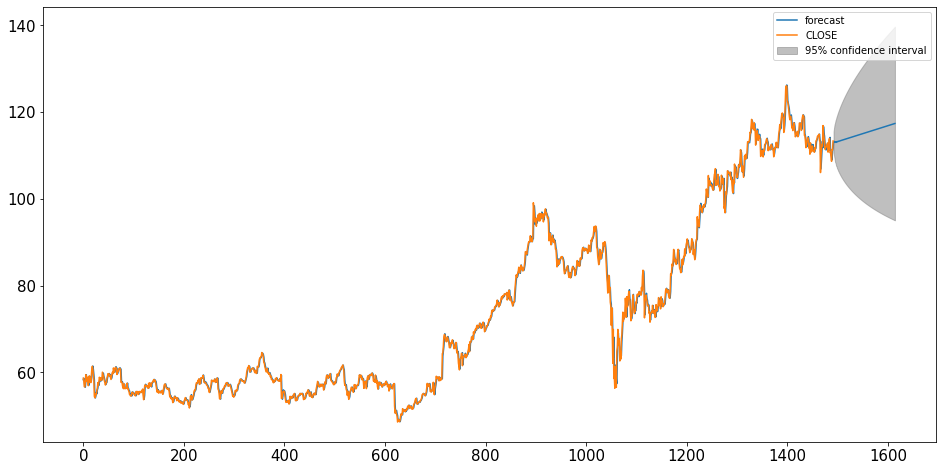

In [72]:
N=16
M=8
fig, ax = plt.subplots(figsize=(N, M))
result_final.plot_predict(start=1,end=1615,dynamic=False, ax =ax);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)